In [103]:
import pandas as pd
from  matplotlib import pyplot as plt

In [104]:
import random

In [105]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [106]:
len(L)

10000

In [107]:
L[:5]

[12, 9, 5, 7, 4]

In [108]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [109]:
import numpy as np
np.cumsum(s)

2     0.0298
3     0.0844
4     0.1685
5     0.2802
6     0.4266
7     0.5935
8     0.7310
9     0.8431
10    0.9195
11    0.9724
12    1.0000
Name: count, dtype: float64

<Axes: >

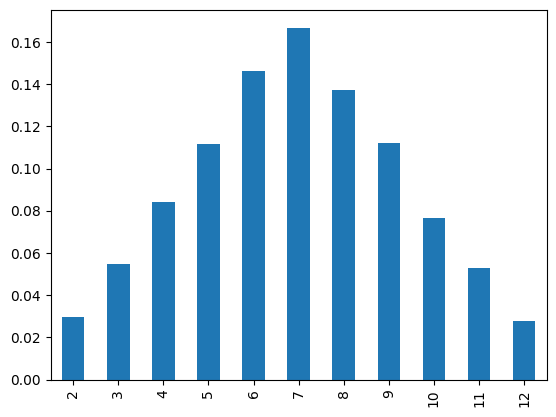

In [110]:
s.plot(kind='bar')

<Axes: >

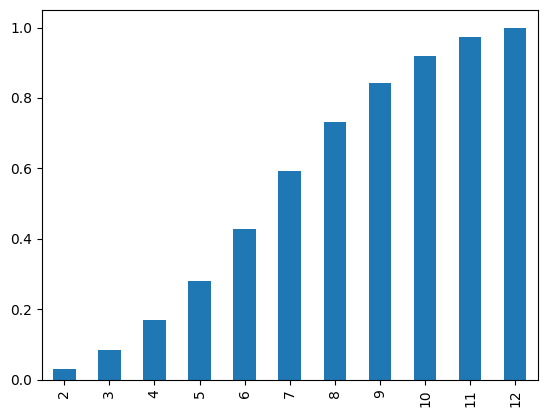

In [111]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [113]:
sample.ndim

1

In [114]:
print(sample.max())
print(np.max(sample))

print(sample.min())
print(np.min(sample))

print(sample.std())
print(np.std(sample))


65.3700869809268
65.3700869809268
32.047709596338386
32.047709596338386
4.923579293877072
4.923579293877072


In [115]:
sample.mean()

np.float64(50.099947024898064)

(array([  2.,   6.,  40., 120., 217., 277., 195., 108.,  27.,   8.]),
 array([32.0477096 , 35.37994733, 38.71218507, 42.04442281, 45.37666055,
        48.70889829, 52.04113603, 55.37337377, 58.7056115 , 62.03784924,
        65.37008698]),
 <BarContainer object of 10 artists>)

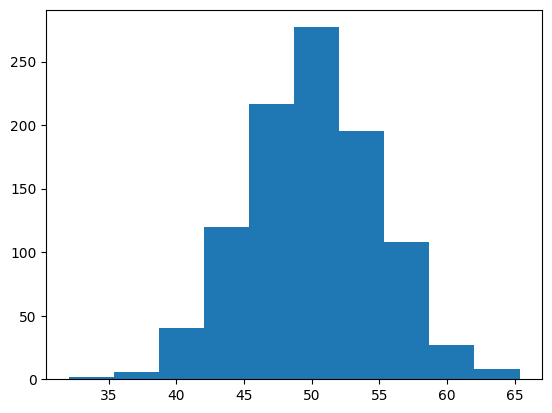

In [116]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [117]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [118]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean,sample_std)

In [119]:
values = np.linspace(sample.min(),sample.max(),100)

In [120]:
sample.max()

np.float64(65.3700869809268)

In [121]:
probabilities_density = [dist.pdf(value) for value in values]


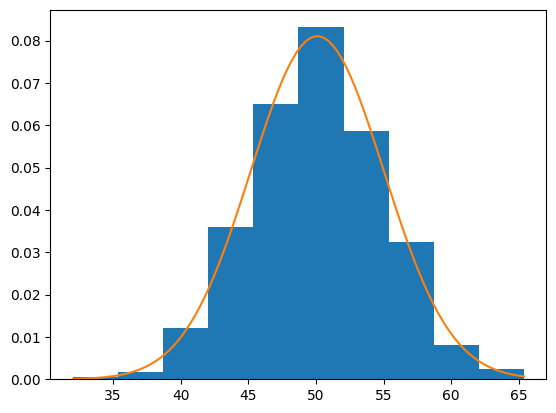

In [122]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities_density)

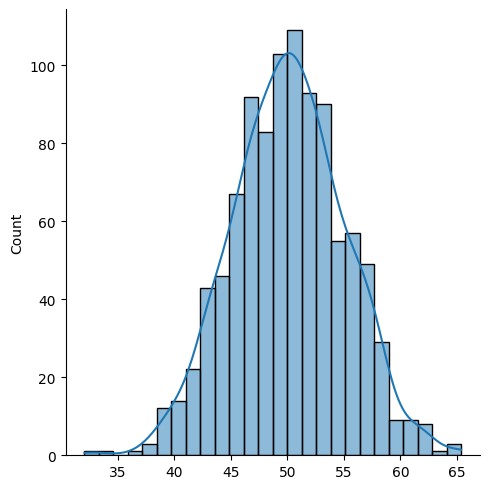

In [123]:
import seaborn as sns
sns.displot(sample, kde=True)

# KDE

In [124]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [125]:
len(sample)

1000

(array([ 3.,  1.,  2.,  8.,  3.,  5.,  5., 13., 10., 23., 19., 20., 20.,
        27., 17., 25., 24., 14., 15., 10., 17., 10., 10.,  6.,  7., 13.,
        10., 17., 27., 29., 44., 45., 49., 68., 46., 47., 61., 43., 33.,
        37., 18., 19., 21., 22., 13.,  4.,  6.,  4.,  5.,  5.]),
 array([ 6.43075945,  7.39443766,  8.35811587,  9.32179409, 10.2854723 ,
        11.24915051, 12.21282872, 13.17650694, 14.14018515, 15.10386336,
        16.06754157, 17.03121979, 17.994898  , 18.95857621, 19.92225442,
        20.88593264, 21.84961085, 22.81328906, 23.77696727, 24.74064549,
        25.7043237 , 26.66800191, 27.63168012, 28.59535834, 29.55903655,
        30.52271476, 31.48639297, 32.45007119, 33.4137494 , 34.37742761,
        35.34110583, 36.30478404, 37.26846225, 38.23214046, 39.19581868,
        40.15949689, 41.1231751 , 42.08685331, 43.05053153, 44.01420974,
        44.97788795, 45.94156616, 46.90524438, 47.86892259, 48.8326008 ,
        49.79627901, 50.75995723, 51.72363544, 52.68731365,

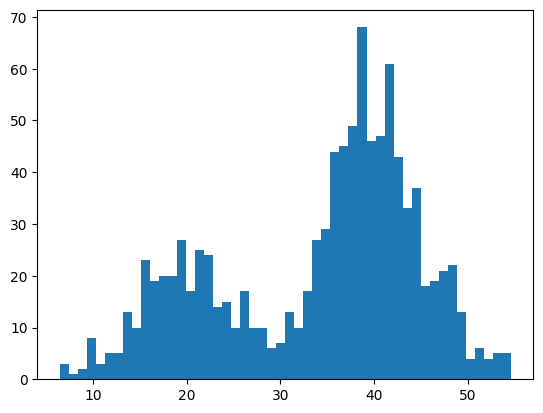

In [126]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [127]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=2, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=2)

In [128]:
sample.min()

np.float64(6.430759448667111)

In [129]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [130]:
probabilities_density = model.score_samples(values)
probabilities_density = np.exp(probabilities_density)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

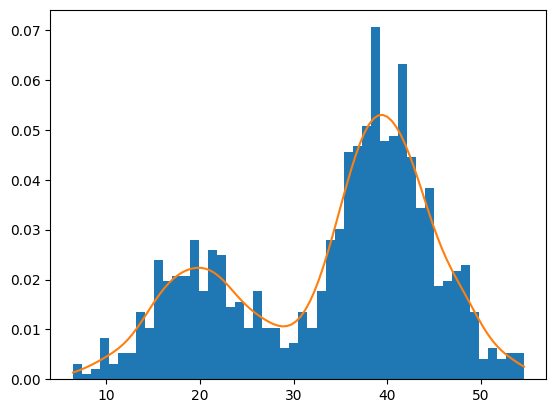

In [131]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities_density)
plt.show()

<Axes: ylabel='Density'>

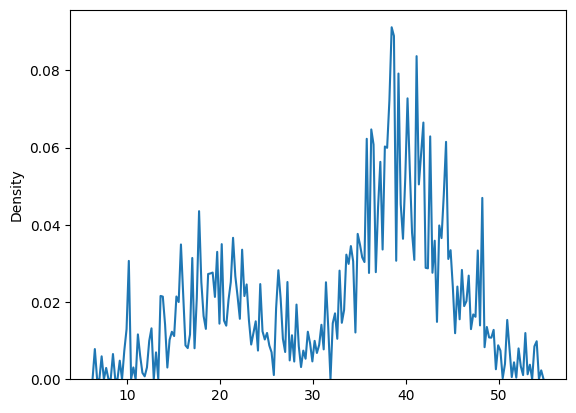

In [132]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02) ##bw_adjust = bandwith(std)

In [133]:
import seaborn as sns

In [134]:
df = sns.load_dataset('iris')

In [135]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

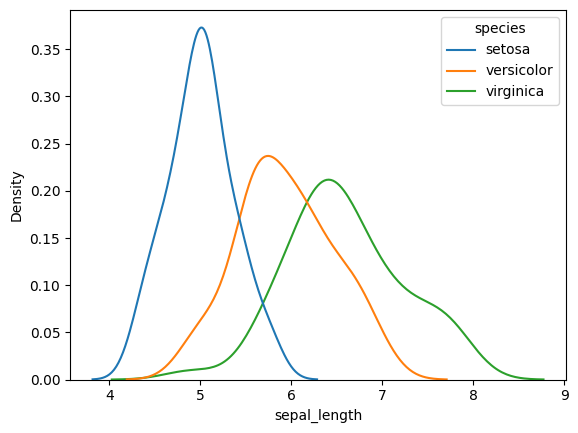

In [136]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

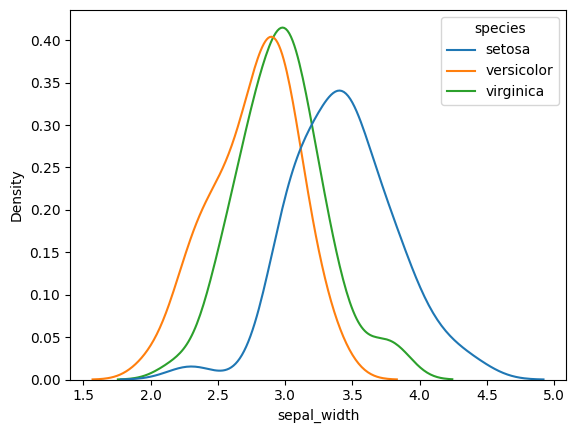

In [137]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

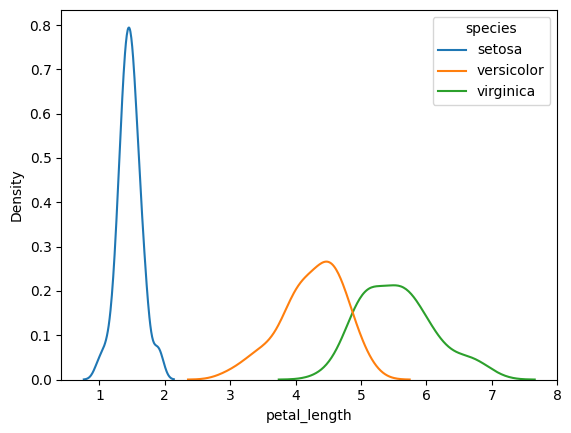

In [138]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

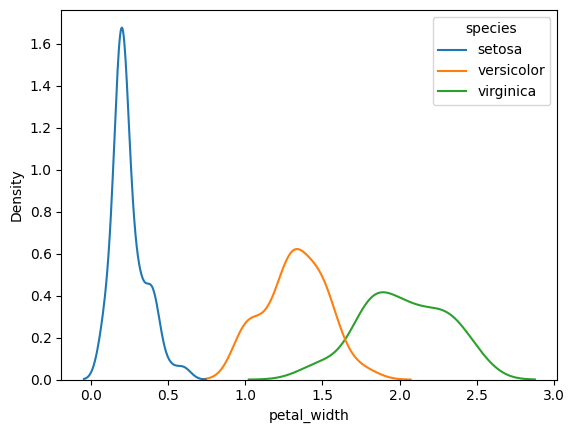

In [139]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

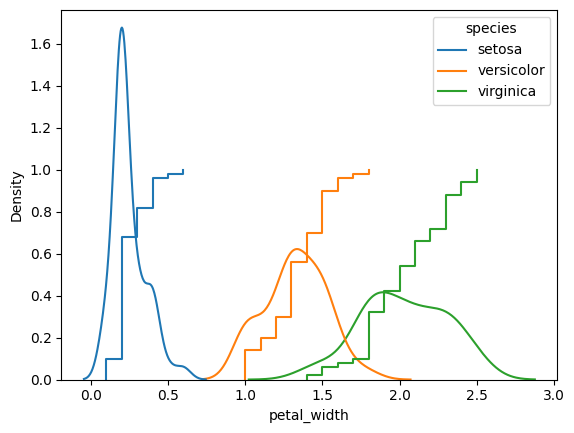

In [140]:
sns.kdeplot(data=df,x='petal_width',hue='species')
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [141]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [142]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

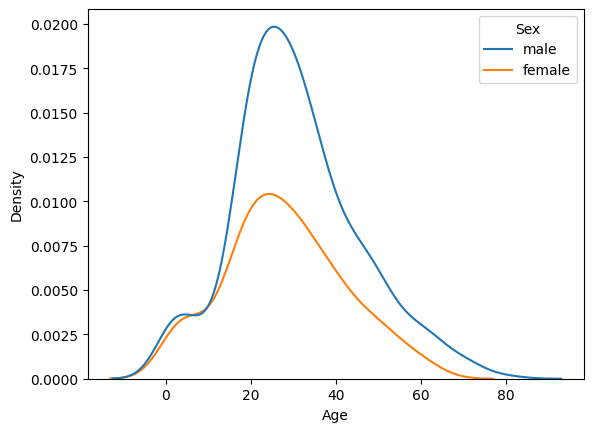

In [143]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

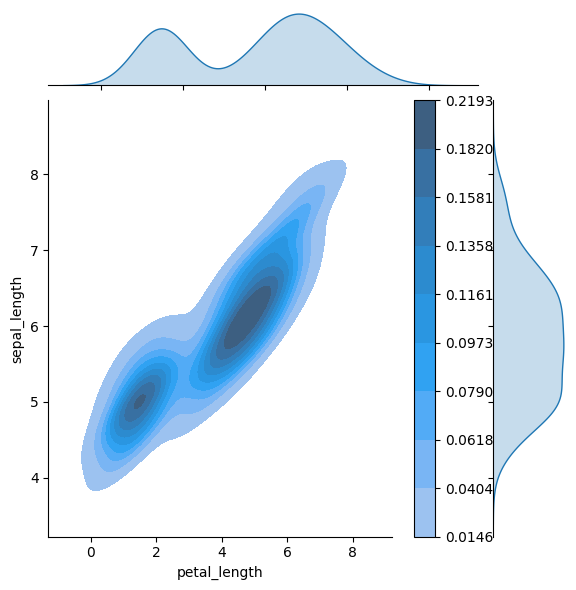

In [144]:
sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

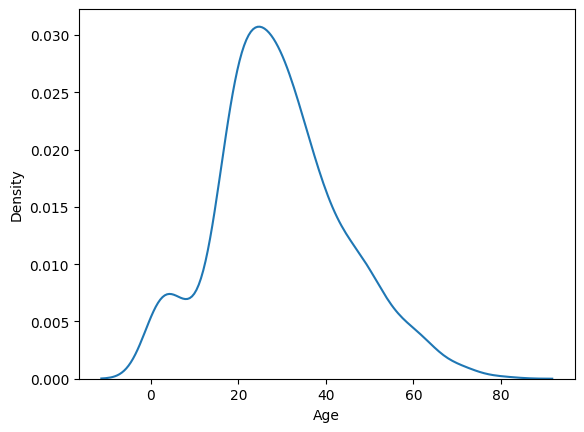

In [145]:
sns.kdeplot(titanic['Age'])

In [155]:
print(f"Mean Value Before Standard Normal dis: {titanic['Age'].mean()}")
print(f"STD Value Before Standard Normal dis: {titanic['Age'].std()}")

Mean Value Before Standard Normal dis: 29.69911764705882
STD Value Before Standard Normal dis: 14.526497332334042


## Converting into the Standard Normal distribution

In [158]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

In [159]:
print(f"Mean Value after Standard Normal dis: {x.mean()}")
print(f"STD Value after Standard Normal dis: {x.std()}")

Mean Value after Standard Normal dis: 2.338621049070358e-16
STD Value after Standard Normal dis: 1.0


<Axes: xlabel='Age', ylabel='Density'>

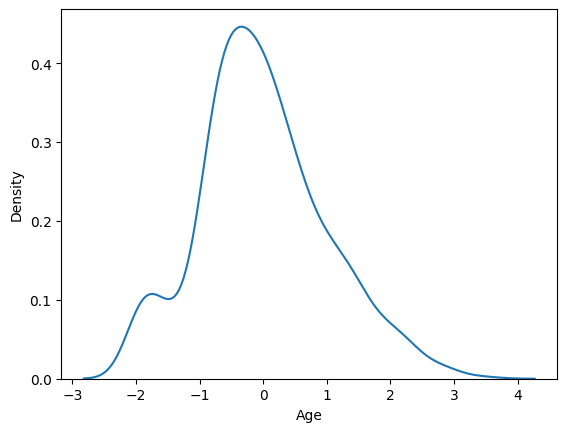

In [160]:
sns.kdeplot(x)

In [161]:
titanic['Age'].skew()

np.float64(0.38910778230082704)

In [162]:
titanic['Age'].mean() + 3*titanic['Age'].std()

np.float64(73.27860964406094)

In [163]:
titanic['Age'].mean() - 3*titanic['Age'].std()

np.float64(-13.880374349943303)

In [164]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [165]:
titanic['Age'].max()

np.float64(80.0)